# Pandas Visualization

C:\Users\joele\AppData\Local\Temp\ipykernel_27376\442760596.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jets', 'Senators', 'Canucks', 'Oilers', 'Flames', 'Maple Leafs', 'Canadians'])


Text(0.5, 0.92, 'Canadian NHL TEAMS 2018 \n \n WINS/LOSSES Vs. HOME ATTENDANCE')

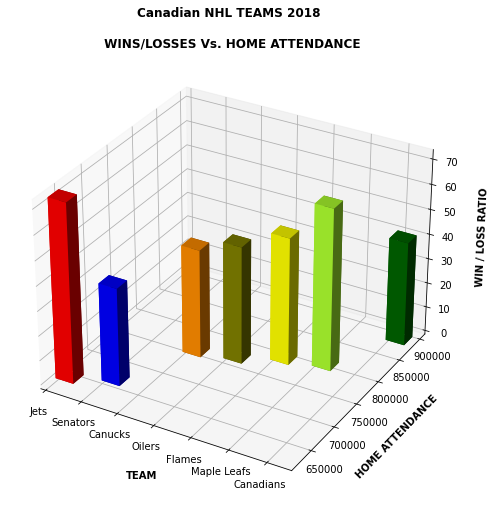

In [1]:
# NHL_ATTENDANCE   https://data.world/makeovermonday/2019w1/workspace/file?filename=NHL+Attendance.xlsx
# NHL_STANDINGS    http://inalitic.com/datasets/nhl_leaguestandings_data.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nhl_attendance = pd.read_excel("C:/Users/joele/Downloads/Files (1)/Files/home/jovyan/Visualization/Portfoilio.ipynb/NHL Attendance.xlsx")
nhl_standings = pd.read_csv('C:/Users/joele/Downloads/Files (1)/Files/home/jovyan/Visualization/Portfoilio.ipynb/nhl_leaguestandings.csv')

nhl_standings = nhl_standings[['SEASON', 'TEAM', 'W', 'L']]
nhl_standings['TEAM'] = nhl_standings['TEAM'].str.strip()

nhl_standings.replace({"Chicago Blackhawks": "Blackhawks", "Montreal Canadiens": "Canadians", 'Philadelphia Flyers': 'Flyers', "Detroit Red Wings": 'Red Wings', 'Toronto Maple Leafs': "Maple Leafs",
                               'Tampa Bay Lightning': "Lightning", 'Minnesota Wild': 'Wild', 'Calgary Flames': 'Flames', 'Washington Capitals': 'Capitals', 'Pittsburgh Penguins': 'Penguins',
                               'Buffalo Sabres': 'Sabres', 'St. Louis': 'Blues', 'Edmonton': 'Oilers', 'Los Angeles': 'Kings', 'Dallas': 'Stars', 'Vancouver': 'Canucks', 'Colorado Avalanche': 'Avalanche',
                               'Vancouver Canucks': 'Canucks', 'Vegas Golden Knights': 'Golden Knights', 'New York Rangers': 'Rangers', 'Boston Bruins': 'Bruins', 'San Jose Sharks': 'Sharks',
                               'Nashville': 'Predators', 'Columbus Blue Jackets': 'Blue Jackets', 'Anaheim': 'Ducks', 'Nashville Predators': 'Predators', 'Ottawa Senators': 'Senators', 'Colorado': 'Avalanche',
                               'St. Louis Blues': 'Blues', 'Dallas Stars': 'Stars', 'Anaheim Ducks': 'Ducks', 'Los Angeles Kings': 'Kings', 'Edmonton Oilers': 'Oilers',
                               'Winnipeg Jets': 'Jets', 'New Jersey Devils': 'Devils', 'Florida Panthers': 'Panthers', 'Carolina Hurricanes': 'Hurricanes', 'Arizona Coyotes': 'Coyotes', 'New York Islanders': 'Islanders'}, inplace=True)

nhl_standings['W/L RATIO'] = nhl_standings['W'] / (nhl_standings['L'] + nhl_standings['W']) * 100
nhl_standings.drop(['W', 'L'], axis=1, inplace=True)


nhl_attendance = nhl_attendance[['SEASON', 'TEAM', 'HOME ATTENDANCE']]
nhl_attendance['TEAM'] = nhl_attendance['TEAM'].str.strip()

nhl_attendance.replace({"Chicago": "Blackhawks", "Montreal": "Canadians", 'Philadelphia': 'Flyers', "Detroit": 'Red Wings', 'Toronto': "Maple Leafs",
                               'Tampa Bay': "Lightning", 'Minnesota': 'Wild', 'Calgary': 'Flames', 'Washington': 'Capitals', 'Pittsburgh': 'Penguins',
                               'Buffalo': 'Sabres', 'St. Louis': 'Blues', 'Edmonton': 'Oilers', 'Los Angeles': 'Kings', 'Dallas': 'Stars', 'Vancouver': 'Canucks',
                               'Vancouver': 'Canucks', 'Vegas': 'Golden Knights', 'NY Rangers': 'Rangers', 'Boston': 'Bruins', 'San Jose': 'Sharks',
                               'Nashville': 'Predators', 'Columbus': 'Blue Jackets', 'Anaheim': 'Ducks', 'Ottawa': 'Senators', 'Colorado': 'Avalanche',
                               'Winnipeg': 'Jets', 'New Jersey': 'Devils', 'Florida': 'Panthers', 'Carolina': 'Hurricanes', 'Arizona': 'Coyotes', 'NY Islanders': 'Islanders'}, inplace=True)

def fix(season):
    season = str(season)
    season = season[:2] + season[-2:]
    return season

nhl_attendance['SEASON'] = nhl_attendance['SEASON'].apply(fix)

nhl_attendance['SEASON'] = nhl_attendance['SEASON'].astype(str)
nhl_standings['SEASON'] = nhl_standings['SEASON'].astype(str)

nhl = pd.merge(nhl_attendance, nhl_standings, how='inner', on=['TEAM', 'SEASON'])
nhl = nhl[nhl['SEASON'] == '2018']
nhl = nhl.loc[nhl['TEAM'].isin(['Canadians','Maple Leafs', 'Flames', 'Oilers','Canucks', 'Senators', 'Jets'])]
nhl.sort_values(by=['HOME ATTENDANCE'], ascending=True, inplace=True)
nhl
nhl['MAP'] = nhl['TEAM'].replace({'Jets': 1,
                                  'Senators': 2,
                                  'Canucks': 3,
                                  'Oilers': 4,
                                  'Flames': 5,
                                  'Maple Leafs': 6,
                                  'Canadians': 7})
nhl.set_index(['MAP'], inplace=True)

x = nhl.index
y = nhl['HOME ATTENDANCE']
z = [0]*7
colors = ['red', 'blue', 'darkorange', 'olive', 'yellow', 'greenyellow', 'darkgreen',]

dx = [0.5]*7
dy = [20000]*7
dz = nhl['W/L RATIO']

plt.figure(figsize=(8, 12))
ax = plt.axes(projection = '3d')
ax.bar3d(x, y, z, dx, dy, dz, color=colors)
ax.set_xticklabels(['Jets', 'Senators', 'Canucks', 'Oilers', 'Flames', 'Maple Leafs', 'Canadians'])
ax.set_xlim(1, 7.5)
#ax.set_ylim(1, 7.5)
ax.set_xlabel("TEAM", labelpad=12, fontweight="bold")
ax.set_zlabel("WIN / LOSS RATIO", labelpad=12, fontweight="bold")
ax.set_ylabel("HOME ATTENDANCE", labelpad=12, fontweight="bold")
ax.set_title("Canadian NHL TEAMS 2018 \n \n WINS/LOSSES Vs. HOME ATTENDANCE", fontweight="bold")

# Machine Learning

In [7]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter



# Classifiers

## KNN Classifier 

### Compare to Dummy Classifier & Show Cross Validation (Score, ROC, Recall)

In [8]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores = []
for neighbor in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors = neighbor).fit(X_train_scaled, y_train)
    scores.append(clf.score(X_test_scaled, y_test))
    # print('test score ' + str(neighbor) + ' neighbor: {:.3f}'.format(clf.score(X_test, y_test)))
# print('The ideal # of neighbors is {}'.format(scores.index((max(scores)))+1))

ideal_neighbor = scores.index((max(scores)))+1


clf = KNeighborsClassifier(n_neighbors = ideal_neighbor).fit(X_train_scaled, y_train)

print('Ideal # of neighbors is ' + str(ideal_neighbor))
print('Training score : {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Test score : {:.3f}'.format(clf.score(X_test_scaled, y_test)))
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5))))
print('Cross-validation (AUC): {:.3f}'.format(np.mean( cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'roc_auc'))))
print('Cross-validation (recall): {:.3f}'.format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'recall'))))

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
y_dummy_predictions = dummy_majority.predict(X_test_scaled)
print('Dummy Classifier Test Score: {:.3f}'.format(dummy_majority.score(X_test_scaled, y_test)))

Ideal # of neighbors is 13
Training score : 0.969
Test score : 0.979
Mean 5-Fold Scores: 0.958
Cross-validation (AUC): 0.998
Cross-validation (recall): 0.989
Dummy Classifier Test Score: 0.622


# Linear Models for Classification


## Logistic Regression Vs. Linear Support Vector Machine 
### Show Scaled Vs. Non-Scaled

In [9]:
X_cancer, y_cancer = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scores = []
# scores_scaled = []
# for c in np.arange(0.0001, 100):
#     clf_scaled = LogisticRegression(C= c).fit(X_train_scaled, y_train)
#     clf = LogisticRegression(C= c).fit(X_train, y_train)
#     scores_scaled.append(clf_scaled.score(X_test_scaled, y_test))
#     scores.append(clf.score(X_test, y_test))

# print(scores_scaled.index((max(scores_scaled)))+1)
# print(scores.index((max(scores)))+1) 

ideal_C = 3
ideal_C_scaled = 1


clf = LogisticRegression(C = ideal_C).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))


clf_scaled = LogisticRegression(C = ideal_C_scaled).fit(X_train_scaled, y_train)
print('\nAccuracy of Logistic regression classifier on training set (Scaled): {:.3f}'.format(clf_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set (Scaled): {:.3f}'.format(clf_scaled.score(X_test_scaled, y_test)))

# scores = []
# scores_scaled = []
# for c in np.arange(0.0001, 100):
#     clf_scaled = LinearSVC(C= c).fit(X_train_scaled, y_train)
#     clf = LinearSVC(C= c).fit(X_train, y_train)
#     scores_scaled.append(clf_scaled.score(X_test_scaled, y_test))
#     scores.append(clf.score(X_test, y_test))

# print (scores_scaled.index((max(scores_scaled)))+1)
# print(scores.index((max(scores)))+1) 

ideal_C = 2
ideal_C_scaled = 21

clf = LinearSVC(C = ideal_C).fit(X_train, y_train)
print('\nAccuracy of LSVM classifier on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of LSVM classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

clf_scaled = LinearSVC(C = ideal_C_scaled).fit(X_train_scaled, y_train)
print('\nAccuracy of LSVM classifier on training set (Scaled): {:.3f}'.format(clf_scaled.score(X_train_scaled, y_train)))
print('Accuracy of LSVM classifier on test set (Scaled): {:.3f}'.format(clf_scaled.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.960
Accuracy of Logistic regression classifier on test set: 0.965

Accuracy of Logistic regression classifier on training set (Scaled): 0.967
Accuracy of Logistic regression classifier on test set (Scaled): 0.979

Accuracy of LSVM classifier on training set: 0.911
Accuracy of LSVM classifier on test set: 0.965

Accuracy of LSVM classifier on training set (Scaled): 0.991
Accuracy of LSVM classifier on test set (Scaled): 0.965


c:\Users\joele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\joele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Kernalized Support Vector Machine

### Show Confusion Matrix & Dummy Classifier

In [10]:
X_cancer, y_cancer = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores = []
for c in np.arange(0.0001, 100):
    clf_scaled = SVC(C= c).fit(X_train_scaled, y_train)
    clf = SVC(C= c, kernel='rbf').fit(X_train, y_train)
    scores.append(clf_scaled.score(X_test_scaled, y_test))

ideal_C = (scores.index((max(scores)))+1) 

clf = SVC(C=ideal_C, gamma=1).fit(X_train_scaled, y_train)
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.3f}'.format(clf.score(X_test_scaled, y_test)))
print('Ideal C parameter is ' + str(ideal_C))

cv_scores = cross_val_score(clf, X_test_scaled, y_test, cv=5)
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cv_scores)))
clf_predicted = clf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, clf_predicted)
print('Confusion Matrix - Kernalized Support Vector Machine\n', confusion)


dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
y_dummy_predictions = dummy_majority.predict(X_test_scaled)
print('Dummy Classifier Test Score: {:.3f}'.format(dummy_majority.score(X_test_scaled, y_test)))
confusion = confusion_matrix(y_test, y_dummy_predictions)

print('Confusion Matrix - Dummy Classifier\n', confusion)


RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.991
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.986
Ideal C parameter is 4
Mean 5-Fold Scores: 0.965
Confusion Matrix - Kernalized Support Vector Machine
 [[52  2]
 [ 0 89]]
Dummy Classifier Test Score: 0.622
Confusion Matrix - Dummy Classifier
 [[ 0 54]
 [ 0 89]]


# Decision Trees

### Show Confusion Matrix & Cross Validation

In [11]:
X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4).fit(X_train_scaled, y_train)

print('Accuracy of DT classifier on training set: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of DT classifier on test set: {:.3f}'.format(clf.score(X_test_scaled, y_test)))
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5))))
print('Cross-validation (AUC): {:.3f}'.format(np.mean( cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'roc_auc'))))
print('Cross-validation (recall): {:.3f}'.format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'recall'))))
clf_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, clf_predicted)
print('Decision tree classifier Confusion Matrix:\n', confusion)

Accuracy of DT classifier on training set: 0.969
Accuracy of DT classifier on test set: 0.958
Mean 5-Fold Scores: 0.916
Cross-validation (AUC): 0.946
Cross-validation (recall): 0.943
Decision tree classifier Confusion Matrix:
 [[54  0]
 [89  0]]


# Naive Bayes Vs. Random Forest Vs. Gradient-boosted decision trees

In [12]:
X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = GaussianNB().fit(X_train_scaled, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.3f}'.format(clf.score(X_test_scaled, y_test)))
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5))))
print('Cross-validation (AUC): {:.3f}'.format(np.mean( cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'roc_auc'))))
print('Cross-validation (recall): {:.3f}'.format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'recall'))))
clf_predicted = clf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, clf_predicted)
print('GaussianNB classifier Confusion Matrix:\n', confusion)


clf = RandomForestClassifier(max_features = 8, random_state = 0).fit(X_train_scaled, y_train)

print('\n\n\nAccuracy of Random Forest Classifier on training set: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.3f}'.format(clf.score(X_test_scaled, y_test)))
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5))))
print('Cross-validation (AUC): {:.3f}'.format(np.mean( cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'roc_auc'))))
print('Cross-validation (recall): {:.3f}'.format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'recall'))))
clf_predicted = clf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, clf_predicted)
print('Random Forest Classifier Confusion Matrix:\n', confusion)

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train_scaled, y_train)

print('\n\n\nAccuracy of Gradient Boosting Classifier on training set: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Gradient Boosting Classifier on test set: {:.3f}'.format(clf.score(X_test_scaled, y_test)))
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5))))
print('Cross-validation (AUC): {:.3f}'.format(np.mean( cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'roc_auc'))))
print('Cross-validation (recall): {:.3f}'.format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'recall'))))
clf_predicted = clf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, clf_predicted)
print('Gradient Boosting Classifier Confusion Matrix:\n', confusion)

Accuracy of GaussianNB classifier on training set: 0.979
Accuracy of GaussianNB classifier on test set: 0.979
Mean 5-Fold Scores: 0.965
Cross-validation (AUC): 0.999
Cross-validation (recall): 0.989
GaussianNB classifier Confusion Matrix:
 [[52  2]
 [ 1 88]]


# Neural Network

In [13]:
X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0, solver='lbfgs').fit(X_train_scaled, y_train)
print('Accuracy of MLP Classifier on training set: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of MLP Classifier on test set: {:.3f}'.format(clf.score(X_test_scaled, y_test)))
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5))))
print('Cross-validation (AUC): {:.3f}'.format(np.mean( cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'roc_auc'))))
print('Cross-validation (recall): {:.3f}'.format(np.mean(cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring = 'recall'))))
clf_predicted = clf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, clf_predicted)
print('MLP Classifier Confusion Matrix:\n', confusion)

Accuracy of MLP Classifier on training set: 0.979
Accuracy of MLP Classifier on test set: 0.979
Mean 5-Fold Scores: 0.965
Cross-validation (AUC): 0.999
Cross-validation (recall): 0.989
MLP Classifier Confusion Matrix:
 [[52  2]
 [ 1 88]]


# Regression

### KNN Regression

In [14]:
X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores = []
for neighbor in range(1, 20):
    knnreg = KNeighborsRegressor(n_neighbors = neighbor).fit(X_train_scaled, y_train)
    scores.append(knnreg.score(X_test_scaled, y_test))

ideal_neighbor = scores.index((max(scores)))+1


knnreg = KNeighborsRegressor(n_neighbors = ideal_neighbor).fit(X_train_scaled, y_train)
y_predict = knnreg.predict(X_test)

print('Ideal # of neighbors is ' + str(ideal_neighbor))
print ('Score (train): {:.3f}'.format(knnreg.score(X_train_scaled, y_train)))
print('Score (test): {:.3f}'.format(knnreg.score(X_test_scaled, y_test)))
cv_scores = cross_val_score(knnreg, X_test_scaled, y_test, cv=5)
print("Mean 5-Fold Scores: {:.3f}".format(np.mean(cv_scores)))
print("R2_score (test): {:.2f}".format(r2_score(y_test, y_predict)))
print("Mean squared error (test): {:.2f}".format(mean_squared_error(y_test, y_predict)))

Ideal # of neighbors is 5
Score (train): 0.565
Score (test): 0.471
Mean 5-Fold Scores: 0.376
R2_score (test): -0.20
Mean squared error (test): 6628.23


# Polynomial Regression
## Combined with Linear Regression, Ridge Regression, Lasso Regression

In [15]:
X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression().fit(X_train_scaled, y_train)

# print('linear model coeff (w): {}'.format(linreg.coef_))
# print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('Linear - R-squared score (training): {:.3f}'.format(linreg.score(X_train_scaled, y_train)))
print('Linear - R-squared score (test): {:.3f}'.format(linreg.score(X_test_scaled, y_test)))


poly = PolynomialFeatures(degree=2)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)


linreg_poly = LinearRegression().fit(X_train_scaled_poly, y_train)

# print('\n\npoly deg 2 - linear model coeff (w): {}\n'.format(linreg.coef_))
# print('poly deg 2 - linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('\n\npoly deg 2 + Linear - R-squared score (training): {:.3f}'.format(linreg_poly.score(X_train_scaled_poly, y_train)))
print('poly deg 2 + Linear - R-squared score (test): {:.3f}'.format(linreg_poly.score(X_test_scaled_poly, y_test)))


scores = []
for alpha in np.arange(0.0001, 100):
    linridge = Ridge(alpha= alpha).fit(X_train_scaled_poly, y_train)
    scores.append(linridge.score(X_test_scaled_poly, y_test))

ideal_alpha = (scores.index((max(scores)))+1) 

linridge = Ridge(alpha = ideal_alpha).fit(X_train_scaled_poly, y_train)


# print('\n\npoly deg 2 + ridge - linear model coeff (w):\n{}'.format(linreg.coef_))
# print('poly deg 2 + ridge - linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('\n\npoly deg 2 + ridge - R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled_poly, y_train)))
print('poly deg 2 + ridge - R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled_poly, y_test)))
print('Ideal alpha is ' + str(ideal_alpha))


scores = []
for alpha in np.arange(0.0001, 100):
    linlasso = Lasso(alpha= alpha).fit(X_train_scaled_poly, y_train)
    scores.append(linlasso.score(X_test_scaled_poly, y_test))

ideal_alpha = (scores.index((max(scores)))+1) 

linlasso = Lasso(alpha = ideal_alpha).fit(X_train_scaled_poly, y_train)

# print('\n\npoly deg 2 + lasso - linear model coeff (w):\n{}'.format(linreg.coef_))
# print('poly deg 2 + lasso - linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('\n\npoly deg 2 + lasso - R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled_poly, y_train)))
print('poly deg 2 + lasso - R-squared score (test): {:.3f}'.format(linlasso.score(X_test_scaled_poly, y_test)))
print('poly deg 2 + lasso - Ideal alpha is ' + str(ideal_alpha))

Linear - R-squared score (training): 0.519
Linear - R-squared score (test): 0.485


poly deg 2 + Linear - R-squared score (training): -0.793
poly deg 2 + Linear - R-squared score (test): -2.041


poly deg 2 + ridge - R-squared score (training): 0.540
poly deg 2 + ridge - R-squared score (test): 0.512
Ideal alpha is 2


poly deg 2 + lasso - R-squared score (training): 0.452
poly deg 2 + lasso - R-squared score (test): 0.478
poly deg 2 + lasso - Ideal alpha is 2


c:\Users\joele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.998e+05, tolerance: 2.001e+02
  model = cd_fast.enet_coordinate_descent(


# Clustering

### K-Means

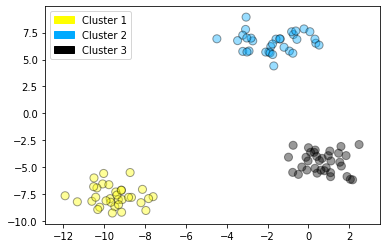

In [16]:
X, y = make_blobs(random_state = 100)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])